In [1]:
import pandas as pd
import numpy as np
import os

C:\Users\benfi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\benfi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# Define the correct file paths
combine_table_path = "C:\\Users\\benfi\\Defensive_Players_NFL\\data\\combine_table.csv"
draft_table_path = "C:\\Users\\benfi\\Defensive_Players_NFL\\data\\draft_table.csv"

# Read the CSV files
combine_table = pd.read_csv(combine_table_path)
draft_table = pd.read_csv(draft_table_path)

In [3]:
combine_table

,combine_player,combine_pos,combine_college,combine_weight,combine_forty,combine_vertical,combine_bench,combine_broad,combine_threecone,combine_shuttle,combine_drafted,combine_college_stats_url,combine_nfl_stats,combine_Year,combine_total_height_inches
0,John Abraham,OLB,South Carolina,252.0,4.55,NaN,NaN,NaN,NaN,NaN,New York Jets / 1st / 13th pick / 2000,NaN,https://www.pro-football-reference.com//player...,2000,76
1,Shaun Alexander,RB,Alabama,218.0,4.58,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks / 1st / 19th pick / 2000,https://www.sports-reference.com/cfb/players/s...,https://www.pro-football-reference.com//player...,2000,72
2,Darnell Alford,OT,Boston Col.,334.0,5.56,25.0,23.0,94.0,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,NaN,https://www.pro-football-reference.com//player...,2000,76
3,Kyle Allamon,TE,Texas Tech,253.0,4.97,29.0,NaN,104.0,7.29,4.49,NaN,NaN,NaN,2000,74
4,Rashard Anderson,CB,Jackson State,206.0,4.55,34.0,NaN,123.0,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,NaN,https://www.pro-football-reference.com//player...,2000,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8315,Roman Wilson,WR,Michigan,185.0,4.39,NaN,12.0,NaN,NaN,NaN,Pittsburgh Steelers / 3rd / 84th pick / 2024,https://www.sports-reference.com/cfb/players/r...,https://www.pro-football-reference.com//player...,2024,71
8316,Mekhi Wingo,DT,LSU,284.0,4.85,31.5,25.0,109.0,NaN,NaN,Detroit Lions / 6th / 189th pick / 2024,https://www.sports-reference.com/cfb/players/m...,https://www.pro-football-reference.com//player...,2024,72
8317,Xavier Worthy,WR,Texas,165.0,4.21,41.0,NaN,131.0,NaN,NaN,Kansas City Chiefs / 1st / 28th pick / 2024,https://www.sports-reference.com/cfb/players/x...,https://www.pro-football-reference.com//player...,2024,71
8318,Jaylen Wright,RB,Tennessee,210.0,4.38,38.0,NaN,134.0,NaN,NaN,Miami Dolphins / 4th / 120th pick / 2024,https://www.sports-reference.com/cfb/players/j...,https://www.pro-football-reference.com//player...,2024,71


In [4]:
pattern_to_replace = "https://www.pro-football-reference.com//players/"
replacement_string = "https://www.pro-football-reference.com/players/"

# Replace the pattern in the "combine_nfl_stats" column
combine_table['combine_nfl_stats'] = combine_table['combine_nfl_stats'].str.replace(pattern_to_replace, replacement_string)

In [5]:
url_corrections = {
    "https://www.sports-reference.com/cfb/players/walter-thurmond-1.html": "https://www.sports-reference.com/cfb/players/walter-thurmond-iii-1.html",
    'https://www.sports-reference.com/cfb/players/jj-watt-2.html':  'https://www.sports-reference.com/cfb/players/jj-watt-1.html',
    'https://www.sports-reference.com/cfb/players/donta-hightower-2.html':  'https://www.sports-reference.com/cfb/players/donta-hightower-1.html',
    'https://www.sports-reference.com/cfb/players/jr-sweezy-2.html':'https://www.sports-reference.com/cfb/players/jr-sweezy-1.html', 
    'https://www.sports-reference.com/cfb/players/louis-nix-iii.html': 'https://www.sports-reference.com/cfb/players/louis-nix-iii-1.html',
    'https://www.sports-reference.com/cfb/players/byron-cowart-2.html': 'https://www.sports-reference.com/cfb/players/byron-cowart-1.html'

}

# Function to correct URLs
def correct_url(url):
    return url_corrections.get(url, url)

# Apply the URL corrections to the "combine_college_stats_url" column
combine_table['combine_college_stats_url'] = combine_table['combine_college_stats_url'].apply(correct_url)


In [6]:
# Count the duplicates in combine_college_stats_url
combine_duplicates_college = combine_table['combine_college_stats_url'].value_counts()

# Filter to show only those that appear more than once
combine_duplicates_college = combine_duplicates_college[combine_duplicates_college > 1]

# Display the results
print("Duplicate URLs in combine_college_stats_url:")
print(combine_duplicates_college)


Duplicate URLs in combine_college_stats_url:
combine_college_stats_url
https://www.sports-reference.com/cfb/players/jarrett-patterson-1.html    2
https://www.sports-reference.com/cfb/players/buster-davis-1.html         2
https://www.sports-reference.com/cfb/players/michael-turk-1.html         2
https://www.sports-reference.com/cfb/players/derrick-johnson-3.html      2
Name: count, dtype: int64


In [7]:
# Examine the rows corresponding to the duplicated URLs
example_combine_college = combine_table[combine_table['combine_college_stats_url'].isin(combine_duplicates_college.index)]

# Display the examples
print("Examples of duplicates in combine_college_stats_url:")
print(example_combine_college)


Examples of duplicates in combine_college_stats_url:
         combine_player combine_pos combine_college  combine_weight  \
1783    Derrick Johnson          CB           Texas           197.0   
1784    Derrick Johnson         OLB           Texas           242.0   
2351       Buster Davis          WR   Florida State           207.0   
2352       Buster Davis         ILB   Florida State           239.0   
6861       Michael Turk           P   Arizona State           226.0   
7205  Jarrett Patterson          OL      Notre Dame           195.0   
7899  Jarrett Patterson           C      Notre Dame           306.0   
7966       Michael Turk           P        Oklahoma           227.0   

      combine_forty  combine_vertical  combine_bench  combine_broad  \
1783           4.43               NaN           18.0            NaN   
1784           4.52              37.5            NaN          120.0   
2351           4.41               NaN            NaN            NaN   
2352           4.64    

In [8]:
# Count the duplicates in combine_college_stats_url
combine_duplicates_nfl = combine_table['combine_nfl_stats'].value_counts()

# Filter to show only those that appear more than once
combine_duplicates_nfl = combine_duplicates_nfl[combine_duplicates_nfl > 1]

# Display the results
print("Duplicate URLs in combine_college_stats_nfl:")
print(combine_duplicates_nfl)

Duplicate URLs in combine_college_stats_nfl:
combine_nfl_stats
https://www.pro-football-reference.com/players/G/GreeMi00.htm    2
https://www.pro-football-reference.com/players/W/WillJa96.htm    2
https://www.pro-football-reference.com/players/J/JohnDe25.htm    2
https://www.pro-football-reference.com/players/S/SmitKe03.htm    2
https://www.pro-football-reference.com/players/C/ColeJu01.htm    2
https://www.pro-football-reference.com/players/C/CartCh00.htm    2
https://www.pro-football-reference.com/players/E/EdwaMi01.htm    2
https://www.pro-football-reference.com/players/D/DaviBu99.htm    2
https://www.pro-football-reference.com/players/W/WillBo00.htm    2
https://www.pro-football-reference.com/players/W/WebbJe00.htm    2
https://www.pro-football-reference.com/players/H/HawkCh00.htm    2
https://www.pro-football-reference.com/players/W/WashTo00.htm    2
https://www.pro-football-reference.com/players/S/SamuSt01.htm    2
https://www.pro-football-reference.com/players/W/WilsTr00.htm    2

In [9]:
# Examine the rows corresponding to the duplicated URLs in combine_nfl_stats
example_combine_nfl = combine_table[combine_table['combine_nfl_stats'].isin(combine_duplicates_nfl.index)]

# Display the examples
print("Examples of duplicates in combine_nfl_stats:")
print(example_combine_nfl)

Examples of duplicates in combine_nfl_stats:
        combine_player combine_pos    combine_college  combine_weight  \
116         Mike Green           S      NW State (LA)           189.0   
117         Mike Green          FB            Houston           253.0   
270        Keith Smith          RB            Arizona           207.0   
310       Boo Williams          RB     South Carolina           222.0   
313      Jack Williams           S      Azusa Pacific           206.0   
360        Chris Brown          OT       Georgia Tech           329.0   
361        Corey Brown          WR              Tulsa           202.0   
383     Justin Coleman          QB   Nebraska-Kearney           238.0   
629       Boo Williams          TE           Arkansas           237.0   
943          Jeff Webb           P         Vanderbilt           215.0   
991        Chris Brown          RB           Colorado           220.0   
1513  Stanford Samuels          CB      Florida State           193.0   
1605  

In [10]:
# Define the indices of the rows you want to remove
indices_to_remove = [1783, 2351, 6861, 7205, 116,3856, 310, 313, 360, 361, 383, 943, 1513, 1605, 2050, 3311, 4200, 4304, 3556]

# Remove specified indices
combine_table_cleaned = combine_table.drop(index=indices_to_remove)




In [11]:
print(combine_table.shape)
print(combine_table_cleaned.shape)

(8320, 15)
(8301, 15)


In [12]:
# Count the duplicates in draft_college_url
college_duplicates = draft_table['draft_college_url'].value_counts()

# Filter to show only those that appear more than once
college_duplicates = college_duplicates[college_duplicates > 1]

# Display the results for college URLs
print("Duplicate URLs in draft_college_url:")
print(college_duplicates)

Duplicate URLs in draft_college_url:
Series([], Name: count, dtype: int64)


In [13]:
# Count the duplicates in draft_player_url
player_duplicates = draft_table['draft_player_url'].value_counts()

# Filter to show only those that appear more than once
player_duplicates = player_duplicates[player_duplicates > 1]

# Display the results for player URLs
print("Duplicate URLs in draft_player_url:")
print(player_duplicates)


Duplicate URLs in draft_player_url:
Series([], Name: count, dtype: int64)


In [14]:
draft_table

,draft_round,draft_pick,draft_team,draft_player,draft_pos,draft_age,draft_to,draft_ap1,draft_pb,draft_st,...,draft_receptions,draft_rec_yds,draft_rec_tds,draft_tackles,draft_ints,draft_sacks,draft_college,draft_college_url,draft_player_url,draft_Year
0,1,1,CLE,Courtney Brown,DE,22.0,2005.0,0,0,4,...,0.0,0.0,0.0,156.0,NaN,19.0,Penn St.,https://www.sports-reference.com/cfb/players/c...,https://www.pro-football-reference.com/players...,2000
1,1,2,WAS,LaVar Arrington,LB,22.0,2006.0,0,3,5,...,0.0,0.0,0.0,338.0,3.0,23.5,Penn St.,https://www.sports-reference.com/cfb/players/l...,https://www.pro-football-reference.com/players...,2000
2,1,3,WAS,Chris Samuels,T,23.0,2009.0,0,6,9,...,0.0,0.0,0.0,NaN,NaN,NaN,Alabama,https://www.sports-reference.com/cfb/players/c...,https://www.pro-football-reference.com/players...,2000
3,1,4,CIN,Peter Warrick,WR,23.0,2005.0,0,0,4,...,275.0,2991.0,18.0,3.0,NaN,NaN,Florida St.,https://www.sports-reference.com/cfb/players/p...,https://www.pro-football-reference.com/players...,2000
4,1,5,BAL,Jamal Lewis,RB,21.0,2009.0,1,1,9,...,221.0,1879.0,4.0,NaN,NaN,NaN,Tennessee,https://www.sports-reference.com/cfb/players/j...,https://www.pro-football-reference.com/players...,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,7,253,LAC,Cornelius Johnson,WR,23.0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Michigan,https://www.sports-reference.com/cfb/players/c...,https://www.pro-football-reference.com/players...,2024
6383,7,254,LAR,KT Leveston,OL,24.0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Kansas St.,https://www.sports-reference.com/cfb/players/k...,https://www.pro-football-reference.com/players...,2024
6384,7,255,GNB,Kalen King,CB,21.0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Penn St.,https://www.sports-reference.com/cfb/players/k...,https://www.pro-football-reference.com/players...,2024
6385,7,256,DEN,Nick Gargiulo,OL,24.0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,South Carolina,https://www.sports-reference.com/cfb/players/n...,https://www.pro-football-reference.com/players...,2024


In [15]:
combine_table_cleaned

,combine_player,combine_pos,combine_college,combine_weight,combine_forty,combine_vertical,combine_bench,combine_broad,combine_threecone,combine_shuttle,combine_drafted,combine_college_stats_url,combine_nfl_stats,combine_Year,combine_total_height_inches
0,John Abraham,OLB,South Carolina,252.0,4.55,NaN,NaN,NaN,NaN,NaN,New York Jets / 1st / 13th pick / 2000,NaN,https://www.pro-football-reference.com/players...,2000,76
1,Shaun Alexander,RB,Alabama,218.0,4.58,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks / 1st / 19th pick / 2000,https://www.sports-reference.com/cfb/players/s...,https://www.pro-football-reference.com/players...,2000,72
2,Darnell Alford,OT,Boston Col.,334.0,5.56,25.0,23.0,94.0,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,NaN,https://www.pro-football-reference.com/players...,2000,76
3,Kyle Allamon,TE,Texas Tech,253.0,4.97,29.0,NaN,104.0,7.29,4.49,NaN,NaN,NaN,2000,74
4,Rashard Anderson,CB,Jackson State,206.0,4.55,34.0,NaN,123.0,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,NaN,https://www.pro-football-reference.com/players...,2000,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8315,Roman Wilson,WR,Michigan,185.0,4.39,NaN,12.0,NaN,NaN,NaN,Pittsburgh Steelers / 3rd / 84th pick / 2024,https://www.sports-reference.com/cfb/players/r...,https://www.pro-football-reference.com/players...,2024,71
8316,Mekhi Wingo,DT,LSU,284.0,4.85,31.5,25.0,109.0,NaN,NaN,Detroit Lions / 6th / 189th pick / 2024,https://www.sports-reference.com/cfb/players/m...,https://www.pro-football-reference.com/players...,2024,72
8317,Xavier Worthy,WR,Texas,165.0,4.21,41.0,NaN,131.0,NaN,NaN,Kansas City Chiefs / 1st / 28th pick / 2024,https://www.sports-reference.com/cfb/players/x...,https://www.pro-football-reference.com/players...,2024,71
8318,Jaylen Wright,RB,Tennessee,210.0,4.38,38.0,NaN,134.0,NaN,NaN,Miami Dolphins / 4th / 120th pick / 2024,https://www.sports-reference.com/cfb/players/j...,https://www.pro-football-reference.com/players...,2024,71


In [16]:
# Drop NaN in the key columns from both DataFrames
combine_table_cleaned_filtered = combine_table_cleaned.dropna(subset=['combine_college_stats_url'])
draft_table_filtered = draft_table.dropna(subset=['draft_college_url'])

# Now merge the filtered DataFrames
merged_df = pd.merge(
    combine_table_cleaned_filtered,
    draft_table_filtered,
    left_on='combine_college_stats_url',
    right_on='draft_college_url',
    how='outer' 
)

In [17]:
merged_df

,combine_player,combine_pos,combine_college,combine_weight,combine_forty,combine_vertical,combine_bench,combine_broad,combine_threecone,combine_shuttle,...,draft_receptions,draft_rec_yds,draft_rec_tds,draft_tackles,draft_ints,draft_sacks,draft_college,draft_college_url,draft_player_url,draft_Year
0,Shaun Alexander,RB,Alabama,218.0,4.58,NaN,NaN,NaN,NaN,NaN,...,215.0,1520.0,12.0,NaN,NaN,NaN,Alabama,https://www.sports-reference.com/cfb/players/s...,https://www.pro-football-reference.com/players...,2000.0
1,LaVar Arrington,OLB,Penn State,250.0,4.53,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,338.0,3.0,23.5,Penn St.,https://www.sports-reference.com/cfb/players/l...,https://www.pro-football-reference.com/players...,2000.0
2,John Baker,P,North Texas,227.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anthony Becht,TE,West Virginia,270.0,4.78,33.5,NaN,123.0,6.94,4.08,...,188.0,1537.0,21.0,6.0,NaN,NaN,West Virginia,https://www.sports-reference.com/cfb/players/a...,https://www.pro-football-reference.com/players...,2000.0
4,Tom Brady,QB,Michigan,211.0,5.28,24.5,NaN,99.0,7.20,4.38,...,3.0,65.0,0.0,1.0,NaN,NaN,Michigan,https://www.sports-reference.com/cfb/players/t...,https://www.pro-football-reference.com/players...,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,https://www.sports-reference.com/cfb/players/j...,https://www.pro-football-reference.com/players...,2024.0
7516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,Miami (FL),https://www.sports-reference.com/cfb/players/m...,https://www.pro-football-reference.com/players...,2024.0
7517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Cincinnati,https://www.sports-reference.com/cfb/players/j...,https://www.pro-football-reference.com/players...,2024.0
7518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,Purdue,https://www.sports-reference.com/cfb/players/s...,https://www.pro-football-reference.com/players...,2024.0


In [18]:
# Drop NaN in the key columns from both DataFrames
combine_table_cleaned_filtered_nfl = combine_table_cleaned.dropna(subset=['combine_nfl_stats'])
draft_table_filtered_player = draft_table.dropna(subset=['draft_player_url'])

# Now merge the filtered DataFrames
merged_df2 = pd.merge(
    combine_table_cleaned_filtered_nfl,
    draft_table_filtered_player,
    left_on='combine_nfl_stats',
    right_on='draft_player_url',
    how='outer' 
)


In [19]:
merged_df2

,combine_player,combine_pos,combine_college,combine_weight,combine_forty,combine_vertical,combine_bench,combine_broad,combine_threecone,combine_shuttle,...,draft_receptions,draft_rec_yds,draft_rec_tds,draft_tackles,draft_ints,draft_sacks,draft_college,draft_college_url,draft_player_url,draft_Year
0,John Abraham,OLB,South Carolina,252.0,4.55,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,463.0,1.0,133.5,South Carolina,NaN,https://www.pro-football-reference.com/players...,2000.0
1,Shaun Alexander,RB,Alabama,218.0,4.58,NaN,NaN,NaN,NaN,NaN,...,215.0,1520.0,12.0,NaN,NaN,NaN,Alabama,https://www.sports-reference.com/cfb/players/s...,https://www.pro-football-reference.com/players...,2000.0
2,Darnell Alford,OT,Boston Col.,334.0,5.56,25.0,23.0,94.0,8.48,4.98,...,0.0,0.0,0.0,NaN,NaN,NaN,Boston Col.,NaN,https://www.pro-football-reference.com/players...,2000.0
3,Rashard Anderson,CB,Jackson State,206.0,4.55,34.0,NaN,123.0,7.18,4.15,...,0.0,0.0,0.0,68.0,1.0,NaN,Jackson St.,NaN,https://www.pro-football-reference.com/players...,2000.0
4,Jake Arians,K,Ala-Birmingham,202.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Cincinnati,https://www.sports-reference.com/cfb/players/j...,https://www.pro-football-reference.com/players...,2024.0
7822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Holy Cross,NaN,https://www.pro-football-reference.com/players...,2024.0
7823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,Purdue,https://www.sports-reference.com/cfb/players/s...,https://www.pro-football-reference.com/players...,2024.0
7824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Kansas St.,https://www.sports-reference.com/cfb/players/k...,https://www.pro-football-reference.com/players...,2024.0


In [20]:
# Append merged_nfl_df to merged_df
final_merged_df = pd.concat([merged_df, merged_df2], ignore_index=True)


In [21]:
final_merged_df

,combine_player,combine_pos,combine_college,combine_weight,combine_forty,combine_vertical,combine_bench,combine_broad,combine_threecone,combine_shuttle,...,draft_receptions,draft_rec_yds,draft_rec_tds,draft_tackles,draft_ints,draft_sacks,draft_college,draft_college_url,draft_player_url,draft_Year
0,Shaun Alexander,RB,Alabama,218.0,4.58,NaN,NaN,NaN,NaN,NaN,...,215.0,1520.0,12.0,NaN,NaN,NaN,Alabama,https://www.sports-reference.com/cfb/players/s...,https://www.pro-football-reference.com/players...,2000.0
1,LaVar Arrington,OLB,Penn State,250.0,4.53,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,338.0,3.0,23.5,Penn St.,https://www.sports-reference.com/cfb/players/l...,https://www.pro-football-reference.com/players...,2000.0
2,John Baker,P,North Texas,227.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anthony Becht,TE,West Virginia,270.0,4.78,33.5,NaN,123.0,6.94,4.08,...,188.0,1537.0,21.0,6.0,NaN,NaN,West Virginia,https://www.sports-reference.com/cfb/players/a...,https://www.pro-football-reference.com/players...,2000.0
4,Tom Brady,QB,Michigan,211.0,5.28,24.5,NaN,99.0,7.20,4.38,...,3.0,65.0,0.0,1.0,NaN,NaN,Michigan,https://www.sports-reference.com/cfb/players/t...,https://www.pro-football-reference.com/players...,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Cincinnati,https://www.sports-reference.com/cfb/players/j...,https://www.pro-football-reference.com/players...,2024.0
15342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Holy Cross,NaN,https://www.pro-football-reference.com/players...,2024.0
15343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,Purdue,https://www.sports-reference.com/cfb/players/s...,https://www.pro-football-reference.com/players...,2024.0
15344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Kansas St.,https://www.sports-reference.com/cfb/players/k...,https://www.pro-football-reference.com/players...,2024.0


In [22]:
final_merged_df = final_merged_df.drop_duplicates()

In [23]:
final_merged_df

,combine_player,combine_pos,combine_college,combine_weight,combine_forty,combine_vertical,combine_bench,combine_broad,combine_threecone,combine_shuttle,...,draft_receptions,draft_rec_yds,draft_rec_tds,draft_tackles,draft_ints,draft_sacks,draft_college,draft_college_url,draft_player_url,draft_Year
0,Shaun Alexander,RB,Alabama,218.0,4.58,NaN,NaN,NaN,NaN,NaN,...,215.0,1520.0,12.0,NaN,NaN,NaN,Alabama,https://www.sports-reference.com/cfb/players/s...,https://www.pro-football-reference.com/players...,2000.0
1,LaVar Arrington,OLB,Penn State,250.0,4.53,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,338.0,3.0,23.5,Penn St.,https://www.sports-reference.com/cfb/players/l...,https://www.pro-football-reference.com/players...,2000.0
2,John Baker,P,North Texas,227.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anthony Becht,TE,West Virginia,270.0,4.78,33.5,NaN,123.0,6.94,4.08,...,188.0,1537.0,21.0,6.0,NaN,NaN,West Virginia,https://www.sports-reference.com/cfb/players/a...,https://www.pro-football-reference.com/players...,2000.0
4,Tom Brady,QB,Michigan,211.0,5.28,24.5,NaN,99.0,7.20,4.38,...,3.0,65.0,0.0,1.0,NaN,NaN,Michigan,https://www.sports-reference.com/cfb/players/t...,https://www.pro-football-reference.com/players...,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,USC,https://www.sports-reference.com/cfb/players/s...,https://www.pro-football-reference.com/players...,2024.0
15339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Kentucky,NaN,https://www.pro-football-reference.com/players...,2024.0
15340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,USC,https://www.sports-reference.com/cfb/players/t...,https://www.pro-football-reference.com/players...,2024.0
15342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Holy Cross,NaN,https://www.pro-football-reference.com/players...,2024.0


In [24]:
# Create the new column 'cfb_url'
final_merged_df['cfb_url'] = final_merged_df['draft_college_url'].fillna(final_merged_df['combine_college_stats_url'])


C:\Users\benfi\AppData\Local\Temp/ipykernel_14104/639778732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_df['cfb_url'] = final_merged_df['draft_college_url'].fillna(final_merged_df['combine_college_stats_url'])


In [25]:
# Define the file path
file_path = 'C:\\Users\\benfi\\Defensive_Players_NFL\\data\\cfb_def_stats.csv'

# Read the CSV file into a DataFrame
defensive_players_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
defensive_players_df

,URL,Year,School,Conf,Class,Pos,G,college_solo_tackles,college_assisted_tackle,college_total_tackles,college_tackles_for_loss,college_sk,college_int,college_int_yds,college_int_td,college_passes_defended,college_fumbles_recov,college_fumbles_recov_yds,college_fumbles_recov_td,college_fumbles_forced
0,https://www.sports-reference.com/cfb/players/a...,NaN,Georgia Tech,ACC,NaN,NaN,38.0,80.0,72.0,152.0,25.0,11.0,0.0,0.0,0.0,2.0,1.0,7.0,0.0,3.0
1,https://www.sports-reference.com/cfb/players/a...,NaN,Iowa State,Big 12,NaN,NaN,24.0,42.0,34.0,76.0,8.0,2.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,https://www.sports-reference.com/cfb/players/a...,NaN,LSU,SEC,NaN,NaN,50.0,100.0,129.0,229.0,22.0,10.0,1.0,10.0,0.0,13.0,1.0,22.0,1.0,7.0
3,https://www.sports-reference.com/cfb/players/a...,NaN,Iowa State,Big 12,NaN,NaN,24.0,162.0,92.0,254.0,17.5,3.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://www.sports-reference.com/cfb/players/a...,NaN,Florida State,ACC,NaN,NaN,36.0,34.0,41.0,75.0,17.5,5.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,https://www.sports-reference.com/cfb/players/x...,NaN,Clemson,ACC,NaN,NaN,61.0,65.0,56.0,121.0,35.0,17.5,0.0,0.0,7.0,2.0,20.0,0.0,6.0,0.0
2587,https://www.sports-reference.com/cfb/players/z...,NaN,Georgia,SEC,NaN,NaN,50.0,28.0,24.0,52.0,5.0,1.5,0.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0
2588,https://www.sports-reference.com/cfb/players/z...,NaN,Washington,Pac-12,NaN,NaN,50.0,58.0,30.0,88.0,19.0,16.0,0.0,0.0,2.0,1.0,29.0,0.0,5.0,0.0
2589,https://www.sports-reference.com/cfb/players/t...,NaN,Georgia,SEC,NaN,NaN,51.0,140.0,75.0,215.0,23.0,5.0,8.0,120.0,1.0,12.0,0.0,0.0,0.0,2.0


In [26]:
# Check for duplicates in the 'URL' column
duplicate_urls = defensive_players_df[defensive_players_df.duplicated(subset='URL', keep=False)]

# Count the number of duplicate URLs
duplicate_count = duplicate_urls['URL'].value_counts()

print(duplicate_count)
print(duplicate_urls)

URL
https://www.sports-reference.com/cfb/players/tykee-smith-1.html    2
Name: count, dtype: int64
                                                    URL  Year   School Conf  \
2580  https://www.sports-reference.com/cfb/players/t...   NaN  Georgia  SEC   
2589  https://www.sports-reference.com/cfb/players/t...   NaN  Georgia  SEC   

      Class  Pos     G  college_solo_tackles  college_assisted_tackle  \
2580    NaN  NaN  51.0                 140.0                     75.0   
2589    NaN  NaN  51.0                 140.0                     75.0   

      college_total_tackles  college_tackles_for_loss  college_sk  \
2580                  215.0                      23.0         5.0   
2589                  215.0                      23.0         5.0   

      college_int  college_int_yds  college_int_td  college_passes_defended  \
2580          8.0            120.0             1.0                     12.0   
2589          8.0            120.0             1.0                     12.0  

In [27]:
complete_df = pd.merge(defensive_players_df, final_merged_df, left_on='URL', right_on='cfb_url', how='inner')


In [28]:
# Drop duplicates based on the 'URL' column
complete_df = complete_df.drop_duplicates(subset='URL')


In [29]:
complete_df

,URL,Year,School,Conf,Class,Pos,G,college_solo_tackles,college_assisted_tackle,college_total_tackles,...,draft_rec_yds,draft_rec_tds,draft_tackles,draft_ints,draft_sacks,draft_college,draft_college_url,draft_player_url,draft_Year,cfb_url
0,https://www.sports-reference.com/cfb/players/a...,NaN,Georgia Tech,ACC,NaN,NaN,38.0,80.0,72.0,152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.sports-reference.com/cfb/players/a...
1,https://www.sports-reference.com/cfb/players/a...,NaN,Iowa State,Big 12,NaN,NaN,24.0,42.0,34.0,76.0,...,0.0,0.0,264.0,2.0,15.0,Iowa St.,https://www.sports-reference.com/cfb/players/a...,https://www.pro-football-reference.com/players...,2008.0,https://www.sports-reference.com/cfb/players/a...
2,https://www.sports-reference.com/cfb/players/a...,NaN,LSU,SEC,NaN,NaN,50.0,100.0,129.0,229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.sports-reference.com/cfb/players/a...
3,https://www.sports-reference.com/cfb/players/a...,NaN,Iowa State,Big 12,NaN,NaN,24.0,162.0,92.0,254.0,...,0.0,0.0,NaN,NaN,NaN,Iowa St.,https://www.sports-reference.com/cfb/players/a...,https://www.pro-football-reference.com/players...,2008.0,https://www.sports-reference.com/cfb/players/a...
4,https://www.sports-reference.com/cfb/players/a...,NaN,Florida State,ACC,NaN,NaN,36.0,34.0,41.0,75.0,...,0.0,0.0,43.0,NaN,4.5,Florida St.,https://www.sports-reference.com/cfb/players/a...,https://www.pro-football-reference.com/players...,2008.0,https://www.sports-reference.com/cfb/players/a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,https://www.sports-reference.com/cfb/players/t...,NaN,Florida,SEC,NaN,NaN,51.0,135.0,79.0,214.0,...,0.0,0.0,NaN,NaN,NaN,Missouri,https://www.sports-reference.com/cfb/players/t...,https://www.pro-football-reference.com/players...,2024.0,https://www.sports-reference.com/cfb/players/t...
2635,https://www.sports-reference.com/cfb/players/x...,NaN,Clemson,ACC,NaN,NaN,61.0,65.0,56.0,121.0,...,0.0,0.0,NaN,NaN,NaN,Clemson,https://www.sports-reference.com/cfb/players/x...,https://www.pro-football-reference.com/players...,2024.0,https://www.sports-reference.com/cfb/players/x...
2636,https://www.sports-reference.com/cfb/players/z...,NaN,Georgia,SEC,NaN,NaN,50.0,28.0,24.0,52.0,...,NaN,NaN,NaN,NaN,NaN,Georgia,https://www.sports-reference.com/cfb/players/z...,https://www.pro-football-reference.com/players...,2024.0,https://www.sports-reference.com/cfb/players/z...
2637,https://www.sports-reference.com/cfb/players/z...,NaN,Washington,Pac-12,NaN,NaN,50.0,58.0,30.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.sports-reference.com/cfb/players/z...


In [30]:
complete_df.columns

Index(['URL', 'Year', 'School', 'Conf', 'Class', 'Pos', 'G',
       'college_solo_tackles', 'college_assisted_tackle',
       'college_total_tackles', 'college_tackles_for_loss', 'college_sk',
       'college_int', 'college_int_yds', 'college_int_td',
       'college_passes_defended', 'college_fumbles_recov',
       'college_fumbles_recov_yds', 'college_fumbles_recov_td',
       'college_fumbles_forced', 'combine_player', 'combine_pos',
       'combine_college', 'combine_weight', 'combine_forty',
       'combine_vertical', 'combine_bench', 'combine_broad',
       'combine_threecone', 'combine_shuttle', 'combine_drafted',
       'combine_college_stats_url', 'combine_nfl_stats', 'combine_Year',
       'combine_total_height_inches', 'draft_round', 'draft_pick',
       'draft_team', 'draft_player', 'draft_pos', 'draft_age', 'draft_to',
       'draft_ap1', 'draft_pb', 'draft_st', 'draft_carav', 'draft_drav',
       'draft_games', 'draft_pass_cmp', 'draft_pass_att', 'draft_pass_yds',
       

In [31]:
# Create new column 'player_name' based on 'draft_player' and 'combine_player'
complete_df['player_name'] = complete_df['draft_player'].fillna(complete_df['combine_player'])

# Create new column 'player_position' based on 'draft_pos' and 'combine_pos'
complete_df['player_position'] = complete_df['draft_pos'].fillna(complete_df['combine_pos'])

# Create new column 'player_year' based on 'draft_year' and 'combine_year'
complete_df['player_year'] = complete_df['draft_Year'].fillna(complete_df['combine_Year'])

# Display the updated DataFrame
print(complete_df[['player_name', 'player_position', 'player_year']].head())


      player_name player_position  player_year
0    Adamm Oliver              DE       2008.0
1    Ahtyba Rubin              DT       2008.0
2   Ali Highsmith             OLB       2008.0
3     Alvin Bowen              LB       2008.0
4  Andre Fluellen              DT       2008.0


In [32]:
# List of columns to remove
columns_to_remove = ['Year', 'Class', 'Pos', 'draft_college_url', 'cfb_url',
                     'combine_college_stats_url', 'combine_nfl_stats', 'combine_player', 
                     'draft_player', 'draft_pos', 'combine_pos', 'draft_Year', 'combine_Year', 'combine_college']

# Remove the columns
complete_df = complete_df.drop(columns=columns_to_remove)

In [33]:
complete_df.columns

Index(['URL', 'School', 'Conf', 'G', 'college_solo_tackles',
       'college_assisted_tackle', 'college_total_tackles',
       'college_tackles_for_loss', 'college_sk', 'college_int',
       'college_int_yds', 'college_int_td', 'college_passes_defended',
       'college_fumbles_recov', 'college_fumbles_recov_yds',
       'college_fumbles_recov_td', 'college_fumbles_forced', 'combine_weight',
       'combine_forty', 'combine_vertical', 'combine_bench', 'combine_broad',
       'combine_threecone', 'combine_shuttle', 'combine_drafted',
       'combine_total_height_inches', 'draft_round', 'draft_pick',
       'draft_team', 'draft_age', 'draft_to', 'draft_ap1', 'draft_pb',
       'draft_st', 'draft_carav', 'draft_drav', 'draft_games',
       'draft_pass_cmp', 'draft_pass_att', 'draft_pass_yds', 'draft_pass_tds',
       'draft_pass_ints', 'draft_rush_att', 'draft_rush_yds', 'draft_rush_tds',
       'draft_receptions', 'draft_rec_yds', 'draft_rec_tds', 'draft_tackles',
       'draft_ints', 'd

In [34]:
columns_to_avg = [
    'college_solo_tackles', 'college_assisted_tackle', 'college_total_tackles', 'college_tackles_for_loss', 
    'college_sk', 'college_int', 'college_int_yds', 'college_int_td', 'college_passes_defended', 
    'college_fumbles_recov', 'college_fumbles_recov_yds', 'college_fumbles_recov_td', 'college_fumbles_forced'
]

# Create new _avg columns by dividing each by 'G' column
for col in columns_to_avg:
    complete_df[f'{col}_avg'] = complete_df[col] / complete_df['G']

In [35]:
complete_df.columns

Index(['URL', 'School', 'Conf', 'G', 'college_solo_tackles',
       'college_assisted_tackle', 'college_total_tackles',
       'college_tackles_for_loss', 'college_sk', 'college_int',
       'college_int_yds', 'college_int_td', 'college_passes_defended',
       'college_fumbles_recov', 'college_fumbles_recov_yds',
       'college_fumbles_recov_td', 'college_fumbles_forced', 'combine_weight',
       'combine_forty', 'combine_vertical', 'combine_bench', 'combine_broad',
       'combine_threecone', 'combine_shuttle', 'combine_drafted',
       'combine_total_height_inches', 'draft_round', 'draft_pick',
       'draft_team', 'draft_age', 'draft_to', 'draft_ap1', 'draft_pb',
       'draft_st', 'draft_carav', 'draft_drav', 'draft_games',
       'draft_pass_cmp', 'draft_pass_att', 'draft_pass_yds', 'draft_pass_tds',
       'draft_pass_ints', 'draft_rush_att', 'draft_rush_yds', 'draft_rush_tds',
       'draft_receptions', 'draft_rec_yds', 'draft_rec_tds', 'draft_tackles',
       'draft_ints', 'd

In [36]:
complete_df['drafted'] = complete_df['draft_pick'].notna()

In [37]:
# Count occurrences of each unique value in the 'draft_round' column, including NaN
draft_round_counts = complete_df['drafted'].value_counts(dropna=False)

# Display the counts
print(draft_round_counts)


drafted
True     1960
False     627
Name: count, dtype: int64


In [38]:
# Display unique values in the 'player_position' column
unique_positions = complete_df['player_position'].unique()

# Print unique positions
print(unique_positions)


['DE' 'DT' 'OLB' 'LB' 'DB' 'ILB' 'CB' 'S' 'DL' 'NT' 'EDGE' 'SAF']


In [39]:
# Define the mapping of positions to groups
position_groups = {
    'DE': 'DL', 'DT': 'DL', 'DL': 'DL', 'NT': 'DL',
    'OLB': 'LB', 'ILB': 'LB', 'LB': 'LB', 'EDGE': 'LB',
    'CB': 'DB', 'S': 'DB', 'SAF': 'DB', 'DB': 'DB'
}

# Create a new column 'position_group' based on the mapping
complete_df['position_group'] = complete_df['player_position'].map(position_groups)

# Display the updated DataFrame with the new 'position_group' column
print(complete_df[['player_position', 'position_group']].head())


  player_position position_group
0              DE             DL
1              DT             DL
2             OLB             LB
3              LB             LB
4              DT             DL


In [40]:
complete_df.columns

Index(['URL', 'School', 'Conf', 'G', 'college_solo_tackles',
       'college_assisted_tackle', 'college_total_tackles',
       'college_tackles_for_loss', 'college_sk', 'college_int',
       'college_int_yds', 'college_int_td', 'college_passes_defended',
       'college_fumbles_recov', 'college_fumbles_recov_yds',
       'college_fumbles_recov_td', 'college_fumbles_forced', 'combine_weight',
       'combine_forty', 'combine_vertical', 'combine_bench', 'combine_broad',
       'combine_threecone', 'combine_shuttle', 'combine_drafted',
       'combine_total_height_inches', 'draft_round', 'draft_pick',
       'draft_team', 'draft_age', 'draft_to', 'draft_ap1', 'draft_pb',
       'draft_st', 'draft_carav', 'draft_drav', 'draft_games',
       'draft_pass_cmp', 'draft_pass_att', 'draft_pass_yds', 'draft_pass_tds',
       'draft_pass_ints', 'draft_rush_att', 'draft_rush_yds', 'draft_rush_tds',
       'draft_receptions', 'draft_rec_yds', 'draft_rec_tds', 'draft_tackles',
       'draft_ints', 'd

In [41]:
# Get all unique values and their counts in the player_year column
unique_player_years = complete_df['player_year'].value_counts()

# Display the unique values and their counts
print(unique_player_years)


player_year
2021.0    201
2010.0    165
2018.0    161
2016.0    160
2023.0    154
2011.0    151
2019.0    150
2017.0    149
2020.0    148
2008.0    148
2014.0    148
2012.0    148
2015.0    143
2013.0    143
2022.0    142
2009.0    141
2024.0    135
Name: count, dtype: int64


In [42]:
# List all unique values in the 'Conf' column
unique_conferences = complete_df['Conf'].unique()

# Display the unique values
print("Unique values in the 'Conf' column:")
print(unique_conferences)


Unique values in the 'Conf' column:
['ACC' 'Big 12' 'SEC' 'Big East' 'Pac-10' 'MWC' 'CUSA' 'Ind' 'Big Ten'
 'WAC' 'MAC' 'Sun Belt' 'Pac-12' 'American']


In [43]:
# Define the Power 5 conferences
power_5_conferences = ['Big 12', 'SEC', 'ACC', 'Pac-12', 'Big Ten']

# Create a new column 'power_5' that is True if the player attended a Power 5 conference, False otherwise
complete_df['power_5'] = complete_df['Conf'].isin(power_5_conferences)

# Get a count of True and False values in the 'power_5' column
power_5_counts = complete_df['power_5'].value_counts()

# Display the count of True and False values
print("Count of Power 5 (True/False):")
print(power_5_counts)


Count of Power 5 (True/False):
power_5
True     1903
False     684
Name: count, dtype: int64


In [44]:
# Dropping NaN values in the 'draft_pick' column and converting it to integers
complete_drafted_df = complete_df.dropna(subset=['draft_pick']).copy()
complete_drafted_df['draft_pick'] = complete_drafted_df['draft_pick'].astype(int)

# Display the updated unique values for verification
print(complete_drafted_df['draft_pick'].unique())

[190 147  87 244  27  20 104 197  35  88 123  50 218 148  67  68 228  72
 185 249   2  92 120  37  82  74 252 192 144   8 173 115 113 208 151 175
   5 206 221 131 119  54 145 102  10 243 165 129  45 220 101 124   9 251
 116  31  29 216 214  28  11 152 245  90 161 188  25 181 143  77  60  93
  32  52 117 121 114  75 242 199 138 194   7  78 183 134  71  63  62  98
 155  86  40 159  47 169 189  43 100   6 212 118 142   4  66 187  15  13
  26  46 191 219  48  41  76 217  56 130 112  42 231 182 203 137 150 168
  96  80  16  33  14 154 166  70 230 179 207 247  34  57  24  95 205  38
  18 186  81  94 146  61  59 126 176 238 136 223  97   3 210 110 157 204
  55 235 158 105  83 109 164 236 135 127 253 226 196 232 215  53  65 202
 201 254 141 248 133 240  44 160 211 167  91 103 163  19 225  49 111 213
 246  39 234 222 139 193 162 106  51 184 140 237 229 195  99 233 224  84
 170  30  21 171 108 200  89 198 209  79  73  36  17  12 174  58 239 132
 125 156 149  22 250  64 180  23 153  69 241   1 17

In [45]:
# Calculate mean height by position group
mean_height_by_position = complete_drafted_df.loc[complete_drafted_df['combine_total_height_inches'] > 0].groupby('position_group')['combine_total_height_inches'].mean()

# Replace zeros with the mean height for the corresponding position group
complete_drafted_df['combine_total_height_inches'] = complete_drafted_df.apply(
    lambda row: mean_height_by_position[row['position_group']] if row['combine_total_height_inches'] == 0 else row['combine_total_height_inches'],
    axis=1
)


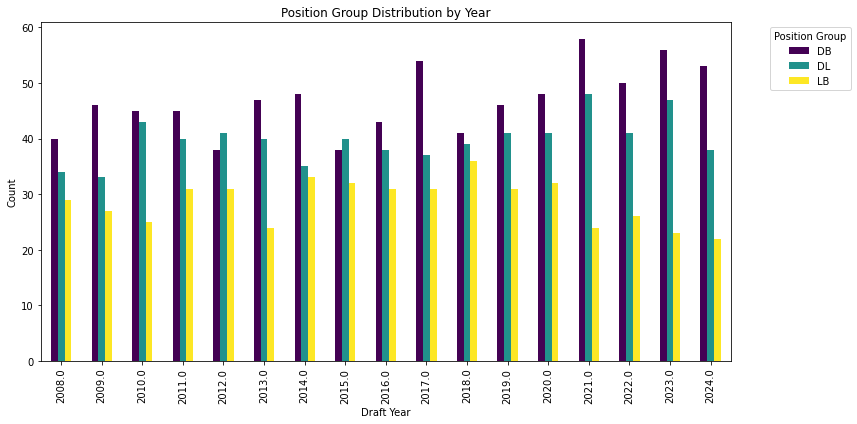

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Grouped bar chart for position group distribution by year
position_year_counts = complete_drafted_df.groupby(['player_year', 'position_group']).size().unstack()

# Plot grouped bar chart
position_year_counts.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Customizing the chart
plt.title('Position Group Distribution by Year')
plt.xlabel('Draft Year')
plt.ylabel('Count')
plt.legend(title='Position Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




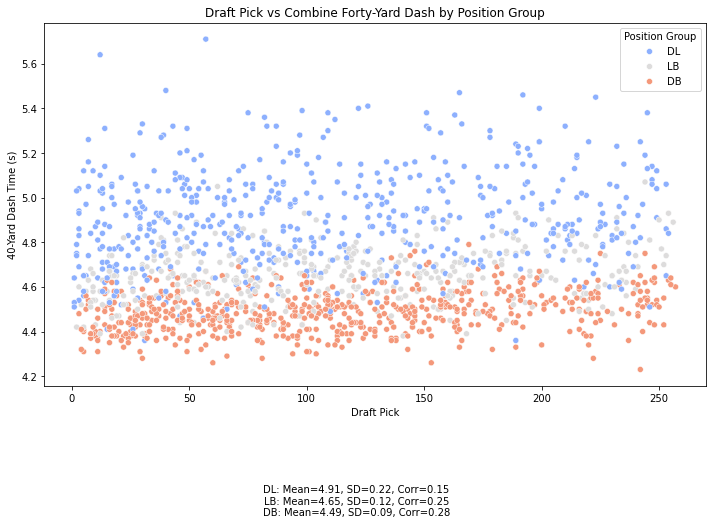

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter relevant columns
subset_df = complete_drafted_df[['combine_forty', 'draft_pick', 'position_group']].dropna()

# Set up the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_df, x='draft_pick', y='combine_forty', hue='position_group', palette='coolwarm')

# Calculate stats for each position group
summary_stats = []
for position in subset_df['position_group'].unique():
    group_data = subset_df[subset_df['position_group'] == position]
    mean_forty = group_data['combine_forty'].mean()
    std_forty = group_data['combine_forty'].std()
    corr = np.corrcoef(group_data['combine_forty'], group_data['draft_pick'])[0, 1]
    summary_stats.append(f'{position}: Mean={mean_forty:.2f}, SD={std_forty:.2f}, Corr={corr:.2f}')

plt.title('Draft Pick vs Combine Forty-Yard Dash by Position Group')
plt.xlabel('Draft Pick')
plt.ylabel('40-Yard Dash Time (s)')
plt.legend(title='Position Group')

# Add text below the graph for summary stats
plt.figtext(0.5, -0.2, "\n".join(summary_stats), wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()



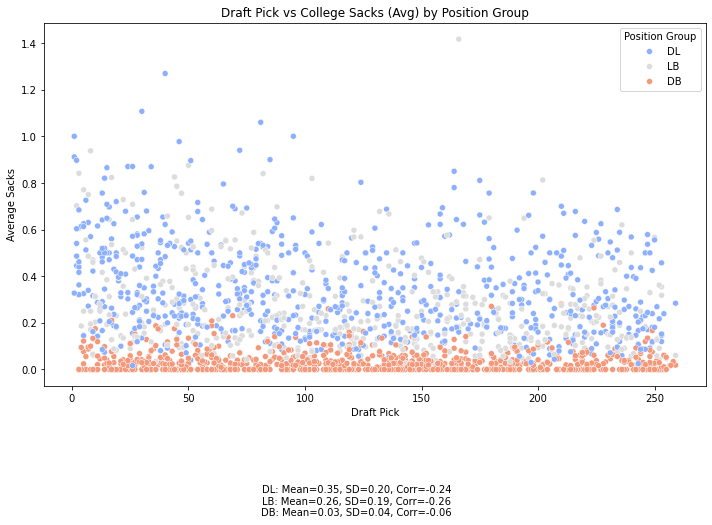

In [48]:
# Filter relevant columns
subset_df_sacks = complete_drafted_df[['college_sk_avg', 'draft_pick', 'position_group']].dropna()

# Set up the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_df_sacks, x='draft_pick', y='college_sk_avg', hue='position_group', palette='coolwarm')

# Calculate stats for each position group
summary_stats_sacks = []
for position in subset_df_sacks['position_group'].unique():
    group_data = subset_df_sacks[subset_df_sacks['position_group'] == position]
    mean_sacks = group_data['college_sk_avg'].mean()
    std_sacks = group_data['college_sk_avg'].std()
    corr_sacks = np.corrcoef(group_data['college_sk_avg'], group_data['draft_pick'])[0, 1]
    summary_stats_sacks.append(f'{position}: Mean={mean_sacks:.2f}, SD={std_sacks:.2f}, Corr={corr_sacks:.2f}')

plt.title('Draft Pick vs College Sacks (Avg) by Position Group')
plt.xlabel('Draft Pick')
plt.ylabel('Average Sacks')
plt.legend(title='Position Group')

# Add text below the graph for summary stats
plt.figtext(0.5, -0.2, "\n".join(summary_stats_sacks), wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()


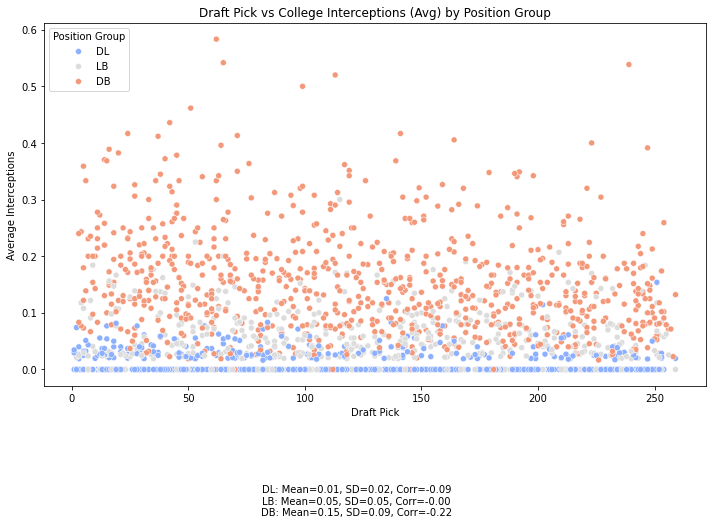

In [49]:
# Filter relevant columns for interceptions
subset_df_int = complete_drafted_df[['college_int_avg', 'draft_pick', 'position_group']].dropna()

# Set up the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_df_int, x='draft_pick', y='college_int_avg', hue='position_group', palette='coolwarm')

# Calculate stats for each position group
summary_stats_int = []
for position in subset_df_int['position_group'].unique():
    group_data = subset_df_int[subset_df_int['position_group'] == position]
    mean_int = group_data['college_int_avg'].mean()
    std_int = group_data['college_int_avg'].std()
    corr_int = np.corrcoef(group_data['college_int_avg'], group_data['draft_pick'])[0, 1]
    summary_stats_int.append(f'{position}: Mean={mean_int:.2f}, SD={std_int:.2f}, Corr={corr_int:.2f}')

# Add plot title and labels
plt.title('Draft Pick vs College Interceptions (Avg) by Position Group')
plt.xlabel('Draft Pick')
plt.ylabel('Average Interceptions')
plt.legend(title='Position Group')

# Add text below the graph for summary stats
plt.figtext(0.5, -0.2, "\n".join(summary_stats_int), wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()


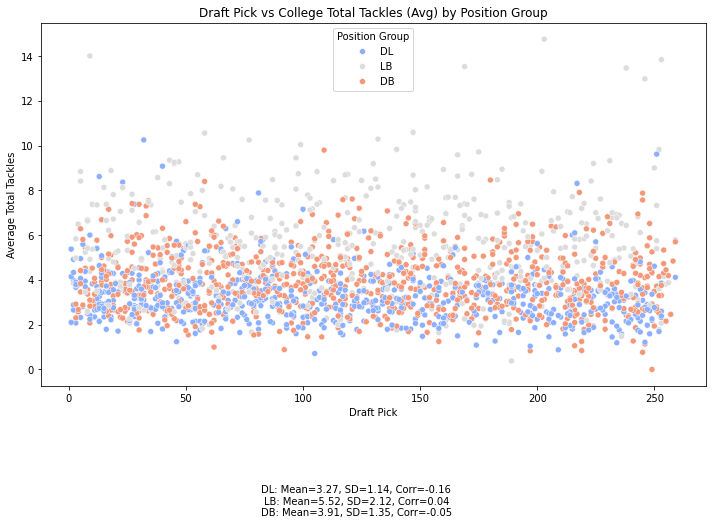

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter relevant columns for total tackles
subset_df_tackles = complete_drafted_df[['college_total_tackles_avg', 'draft_pick', 'position_group']].dropna()

# Set up the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_df_tackles, x='draft_pick', y='college_total_tackles_avg', hue='position_group', palette='coolwarm')

# Calculate stats for each position group
summary_stats_tackles = []
for position in subset_df_tackles['position_group'].unique():
    group_data = subset_df_tackles[subset_df_tackles['position_group'] == position]
    mean_tackles = group_data['college_total_tackles_avg'].mean()
    std_tackles = group_data['college_total_tackles_avg'].std()
    corr_tackles = np.corrcoef(group_data['college_total_tackles_avg'], group_data['draft_pick'])[0, 1]
    summary_stats_tackles.append(f'{position}: Mean={mean_tackles:.2f}, SD={std_tackles:.2f}, Corr={corr_tackles:.2f}')

plt.title('Draft Pick vs College Total Tackles (Avg) by Position Group')
plt.xlabel('Draft Pick')
plt.ylabel('Average Total Tackles')
plt.legend(title='Position Group')

# Add text below the graph for summary stats
plt.figtext(0.5, -0.2, "\n".join(summary_stats_tackles), wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()


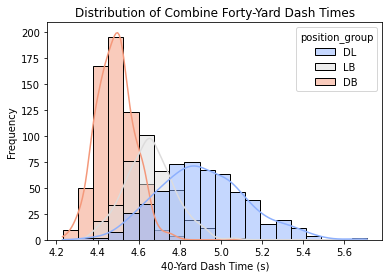

In [51]:
sns.histplot(data=complete_drafted_df, x='combine_forty', hue='position_group', kde=True, palette='coolwarm', bins=20)
plt.title('Distribution of Combine Forty-Yard Dash Times')
plt.xlabel('40-Yard Dash Time (s)')
plt.ylabel('Frequency')
plt.show()


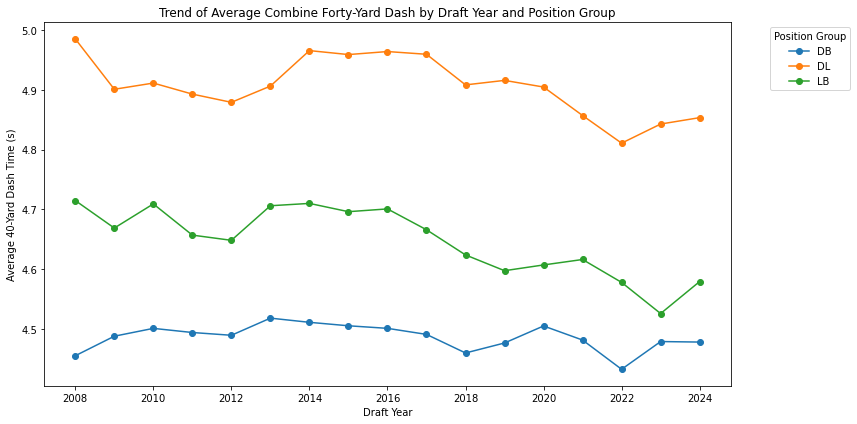

In [52]:
# Group by year and position group to calculate the average 40-yard dash time
avg_forty_by_year_position = complete_drafted_df.groupby(['player_year', 'position_group'])['combine_forty'].mean().unstack()

# Plot the trend for each position group
avg_forty_by_year_position.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Trend of Average Combine Forty-Yard Dash by Draft Year and Position Group')
plt.xlabel('Draft Year')
plt.ylabel('Average 40-Yard Dash Time (s)')
plt.legend(title='Position Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


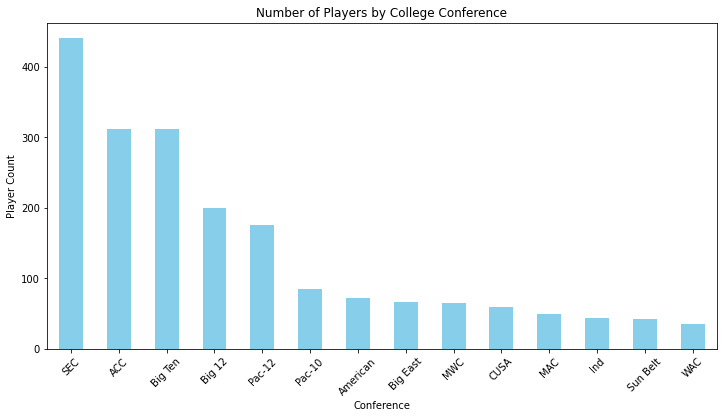

In [53]:
# Bar chart for conference representation
conference_counts = complete_drafted_df['Conf'].value_counts()
conference_counts.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Number of Players by College Conference')
plt.xlabel('Conference')
plt.ylabel('Player Count')
plt.xticks(rotation=45)
plt.show()


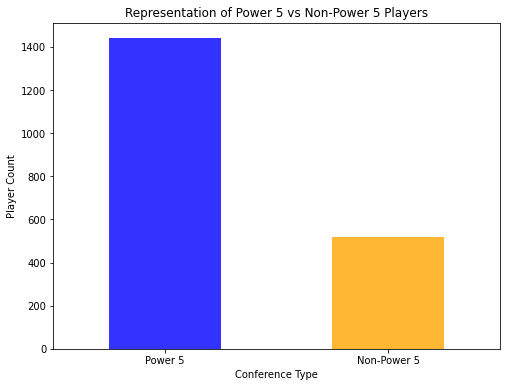

In [54]:
# Bar chart for Power 5 vs Non-Power 5 representation
power_5_counts = complete_drafted_df['power_5'].value_counts()
power_5_labels = ['Power 5', 'Non-Power 5']

plt.figure(figsize=(8, 6))
power_5_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.8)
plt.title('Representation of Power 5 vs Non-Power 5 Players')
plt.xlabel('Conference Type')
plt.ylabel('Player Count')
plt.xticks(ticks=[0, 1], labels=power_5_labels, rotation=0)
plt.show()


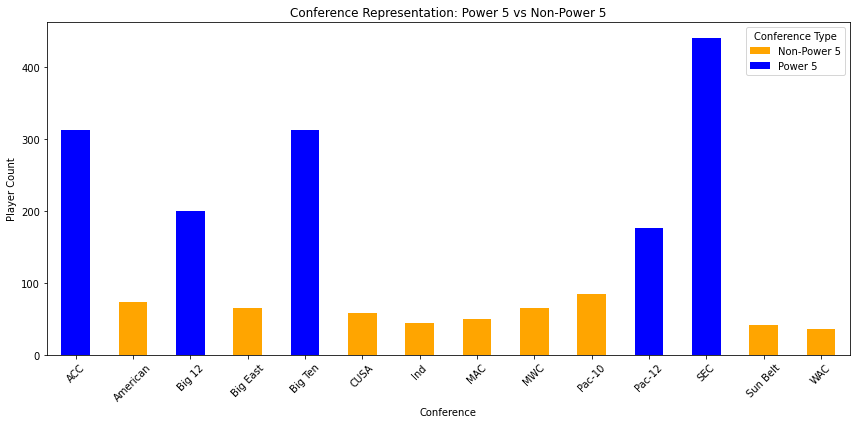

In [55]:
import matplotlib.pyplot as plt

# Prepare data
conference_counts = complete_drafted_df.groupby(['Conf', 'power_5']).size().unstack(fill_value=0)

# Plot the stacked bar chart
conference_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['orange', 'blue'])
plt.title('Conference Representation: Power 5 vs Non-Power 5')
plt.xlabel('Conference')
plt.ylabel('Player Count')
plt.xticks(rotation=45)
plt.legend(['Non-Power 5', 'Power 5'], title='Conference Type')
plt.tight_layout()
plt.show()



In [56]:
list(complete_drafted_df)

['URL',
 'School',
 'Conf',
 'G',
 'college_solo_tackles',
 'college_assisted_tackle',
 'college_total_tackles',
 'college_tackles_for_loss',
 'college_sk',
 'college_int',
 'college_int_yds',
 'college_int_td',
 'college_passes_defended',
 'college_fumbles_recov',
 'college_fumbles_recov_yds',
 'college_fumbles_recov_td',
 'college_fumbles_forced',
 'combine_weight',
 'combine_forty',
 'combine_vertical',
 'combine_bench',
 'combine_broad',
 'combine_threecone',
 'combine_shuttle',
 'combine_drafted',
 'combine_total_height_inches',
 'draft_round',
 'draft_pick',
 'draft_team',
 'draft_age',
 'draft_to',
 'draft_ap1',
 'draft_pb',
 'draft_st',
 'draft_carav',
 'draft_drav',
 'draft_games',
 'draft_pass_cmp',
 'draft_pass_att',
 'draft_pass_yds',
 'draft_pass_tds',
 'draft_pass_ints',
 'draft_rush_att',
 'draft_rush_yds',
 'draft_rush_tds',
 'draft_receptions',
 'draft_rec_yds',
 'draft_rec_tds',
 'draft_tackles',
 'draft_ints',
 'draft_sacks',
 'draft_college',
 'draft_player_url',
 '

In [57]:
# Specify the output file path
output_file = os.path.join('C:\\Users\\benfi\\Defensive_Players_NFL\\data', 'complete_drafted_df.csv')

# Save the combined dataframe to a new CSV file
complete_drafted_df.to_csv(output_file, index=False)

print(f'Combined DataFrame has been saved as "complete_drafted_df.csv"')

Combined DataFrame has been saved as "complete_drafted_df.csv"
